In [1]:
def solution(phone_book):
    
    # String length에 따라서 소팅을 먼저 해야할거같음
    # 그리고 앞글자와 비교할수밖에 없는데?
    # 인풋 리스트의 크기가 1000000이라서 그냥 포문 돌려버리면 효율성이 안됨.. -> 이럴때 대처법은?
    # sorted를 먼저 함으로써 이득을 봐야하는 상황. 아 이렇게 되면 뇌정지가 옴. 어떻게 이걸 효율화 해야하지? 포문을 하나 없애고싶은디..
    # 해쉬 문제인데 해쉬가 도대체 어디에 들어가야하는지 모르겠음
    
    answer = True
    sorted_list = sorted(phone_book, key=lambda x: len(x))
    
    
    for idx,i in enumerate(sorted_list):
        for j in sorted_list[idx+1:]:
            # compare
            item_1 = i
            item_2 = j[:len(item_1)]
            if item_1 == item_2: # 접두사이면,
                answer = False
                break
    
    return answer

In [2]:
phone_book = ["119", "97674223", "1195524421"]

In [3]:
solution(phone_book)

False

In [4]:
def solution(phone_book):
    
    """
    hash에 저장해서 나온 풀이. 남의 풀이를 참고했음.
    애초에 이렇게 dict를 사용하는게 익숙치가 않고 (지금까지 key:val의 관계를 val이 먼가 가공된 데이터 인 경우만 생각했기 때문. length나 freq나)
    위와 비교해서 어디서 효율성이 증대됐는지 복잡도가 어케되는지 계산을 못하게씀 ㅠㅠ;;
    아 시바 이것도 테스트 3,4는 통과 못해부네 뭐냐;;;
    """
    
    answer = True
    sorted_list = sorted(phone_book, key=lambda x: len(x))
    
    for idx, i in enumerate(sorted_list):
        _dict = {}
        
        for j in sorted_list[idx+1:]:
            value = i 
            key = j[:len(i)] # j를 i의 크기만큼 자른 값
            _dict[key] = value # hash에 저장
        
        print(_dict)
        if _dict.get(i):
            answer = False
            break

    return answer

In [5]:
phone_book = ["123", "456", "789"]

In [6]:
solution(phone_book)

{'456': '123', '789': '123'}
{'789': '456'}
{}


True

### 먼저 sort 후 string의 startswith를 이용한 풀이

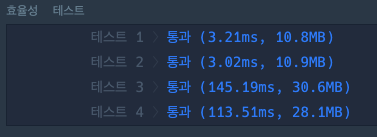

In [5]:
# best code 1
def solution(phone_book):
    phone_book = sorted(phone_book) # 문자 길이 상관없이 문자열을 정렬함. -> 이러면 같은 접두사끼리 자동으로 모이게 됨.
    for p1, p2 in zip(phone_book, phone_book[1:]): # list에서 전화번호 비교 시 바로 다음 번호와 비교
        if p2.startswith(p1):
            return False
    return True

In [7]:
# best code 1-1
"""
sorted : O(nlogn)
"""
def solution(phone_book):
    phone_book = sorted(phone_book) # 문자 길이 상관없이 문자열을 정렬함. -> 이러면 같은 접두사끼리 자동으로 모이게 됨.
    for idx, _ in enumerate(phone_book):
        if idx+1 == len(phone_book): 
            break
            
        if phone_book[idx+1].startswith(phone_book[idx]):
            return False
    
    return True

In [8]:
phone_book = ["119", "18", "97674223", "1195524421"]
solution(phone_book)

False

### Hash를 이용한 풀이

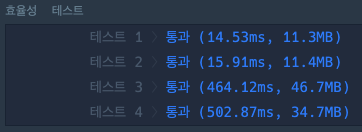

In [9]:
# best code 2 : hash 를 사용한 풀이
def solution(phone_book):
    answer = True
    hash_map = {}
    
    # 초기화
    for phone_num in phone_book:
        hash_map[phone_num] = 1
    
    for phone_num in phone_book:
        temp = ""
        for num in phone_num: # phone_num = 119
            temp += num # temp = 1, num = 1 
            if temp in hash_map and temp != phone_num:
                answer = False
    
    return answer


In [13]:
phone_book = ["119", "18", "97674223", "1195524421"]

In [10]:
solution(phone_book)

False

### 깨달음의 코드

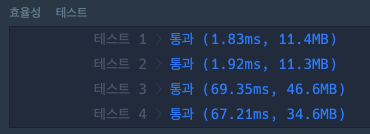

In [20]:
# best_code 2를 최적화 해보자.
"""
파이썬에서 각 자료구조마다 in을 사용할때 시간 복잡도가 달라진다.
list, tuple : O(n) -  하나하나 순회하기 때문
set, dict : Avg O(1), Worst O(n) - 내부적으로 hash를 통해 저장하므로 접근 시간은 O(1)이다. 
그래서 위 코드에서 list에다가 in을 바로 할수도 있었는데 빈 dict을 만들었을 것이다..

<아이디어>
temp라는 빈 스트링에 idx를 1씩 증가시켜가면서 string을 붙인 후, dict의 key와 비교하고 있는데,
이를 미리 지정된 크기만큼만 잘라서 비교하면 전체를 loop 돌릴 필요가 없어서 빨라질 것이다!
"""

def solution(phone_book):
    
    # dict 초기화
    _dict = {}
    for phone_num in phone_book:
        _dict[phone_num] = len(phone_num)
    
    # length 저장
    slice_length_list = set([i for i in _dict.values()])
    
    # 비교
    ## _dict안의 value들은 len을 저장하고 있고, 이들이 temp 길이의 기준이 됨.
    ## [2,3,5,6,6] -> 중복되는 숫자가 존재함. set으로 처리함
    
    for phone_num in phone_book:
        for slice_length in slice_length_list: # [8, 10, 2, 3]
            # slice가 phone_num의 length를 넘어서거나 같으면 의미가 없음.
            if slice_length < len(phone_num):
                if phone_num[:slice_length] in _dict: # 자른 숫자가 _dict에 저장되어 있으면 False 리턴
                    return False
                
    return True        

In [21]:
phone_book = ["119", "18", "97674223", "1195524421"]

In [22]:
solution(phone_book)

False